In [7]:
import tushare as ts
import scipy.stats as scs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

token='5d12fd005a33f96b664b0a393e72288545d2dfd6723be471c0bdb47f'
try:
    pro = ts.pro_api(token)
    df = pro.query('daily', ts_code='000001.SZ', start_date='20191201', end_date='20200924')
    df.to_csv('stockdata.csv') # 保存数据
    print('Saved')
except:
    print('Not saved')


Saved


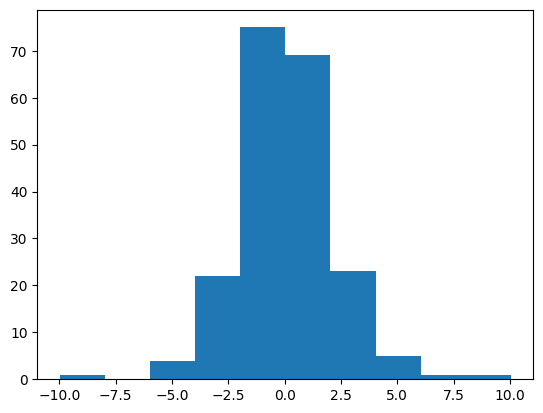

In [8]:
def normality_test(array):
    p_value = scs.normaltest(array)[1]
    print("p value: ", p_value)

data = pd.read_csv('stockdata.csv')[::-1]
df0 = data['pct_chg']
plt.hist(df0)
plt.show() # 涨跌幅分布